# RNA velocity analysis

In [1]:
import sys

if "google.colab" in sys.modules:
    !pip install -q git+https://github.com/theislab/cellrank@dev
    !pip install python-igraph

In [2]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [3]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd

## Time window E13.5 to PD4

In [6]:
adata = sc.read("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221219.adata.e13_pd4.scviintegrated.LABELED.hvg5500.seed16.min_dist0.4.gene1000.mt7.5.h5ad")

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


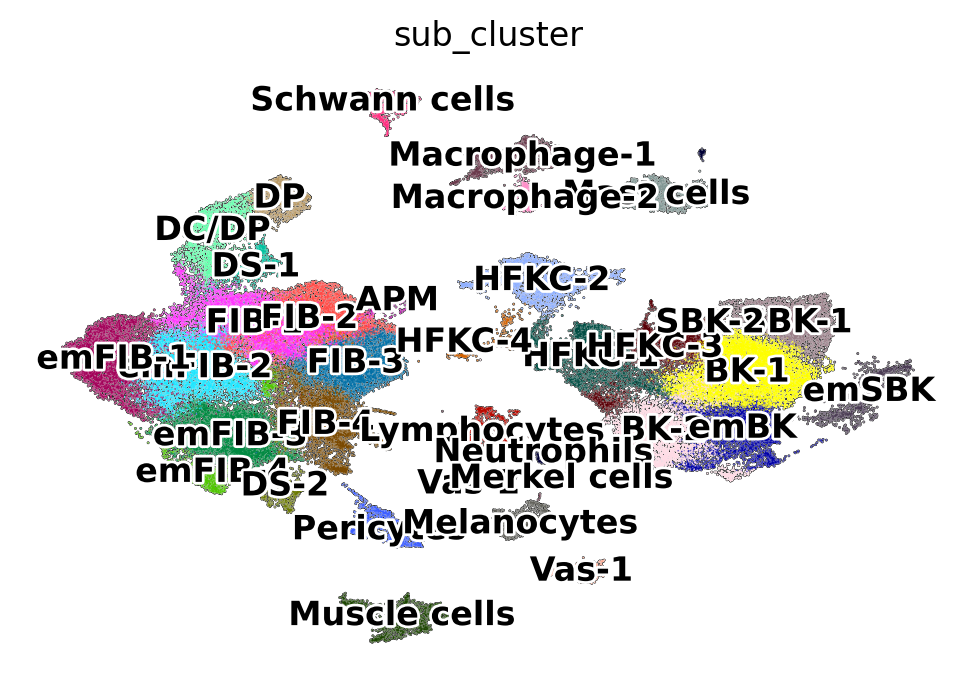

In [7]:
sc.pl.umap(
    adata,
    color=["sub_cluster"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2
)

In [8]:
ldata = scv.read("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/220912_DP_ver3.0_scvi/e14_p4.allmerged.loom", cache=True)

In [9]:
#Barcode matching

In [ ]:
adata=sc.read("adata_scviintegrated.ldata.combined.ENTIRE.h5ad")

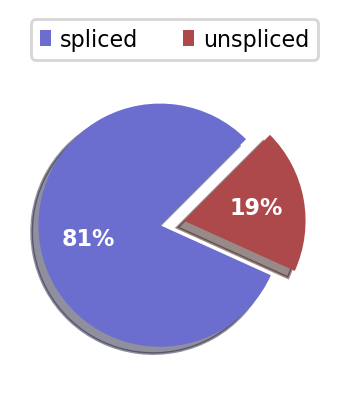

AnnData object with n_obs × n_vars = 85645 × 5499
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5', 'sub_cluster', '_scvi_raw_norm_scaling', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-

In [25]:
scv.pl.proportions(adata)
adata

In [26]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.pp.neighbors(adata, use_rep="X_scVI")
scv.pp.moments(adata, n_pcs=None, n_neighbors=None) 

Filtered out 1468 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:09) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [27]:
scv.tl.recover_dynamics(adata, n_jobs=20)

recovering dynamics (using 20/80 cores)


  0%|          | 0/1651 [00:00<?, ?gene/s]

    finished (0:23:50) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [28]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata, n_jobs=20)

computing velocities
    finished (0:04:50) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/80 cores)


  0%|          | 0/85645 [00:00<?, ?cells/s]

    finished (0:01:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [29]:
adata

AnnData object with n_obs × n_vars = 85645 × 2000
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5', 'sub_cluster', '_scvi_raw_norm_scaling', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFi

computing velocity embedding
    finished (0:00:23) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


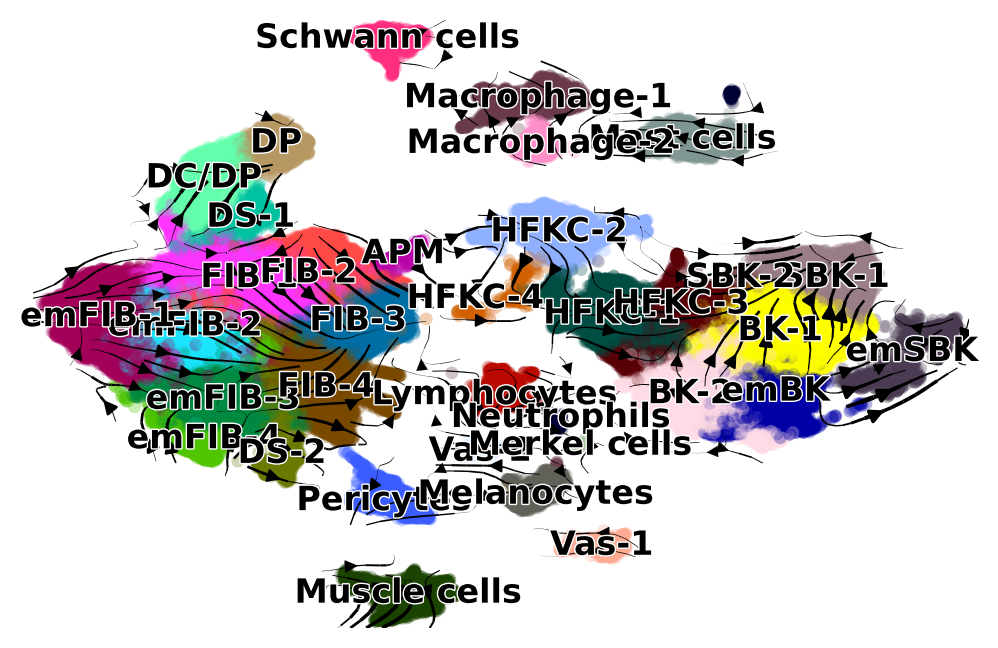

In [30]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", color="sub_cluster"
)

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_velocity_entire_title.tif.png


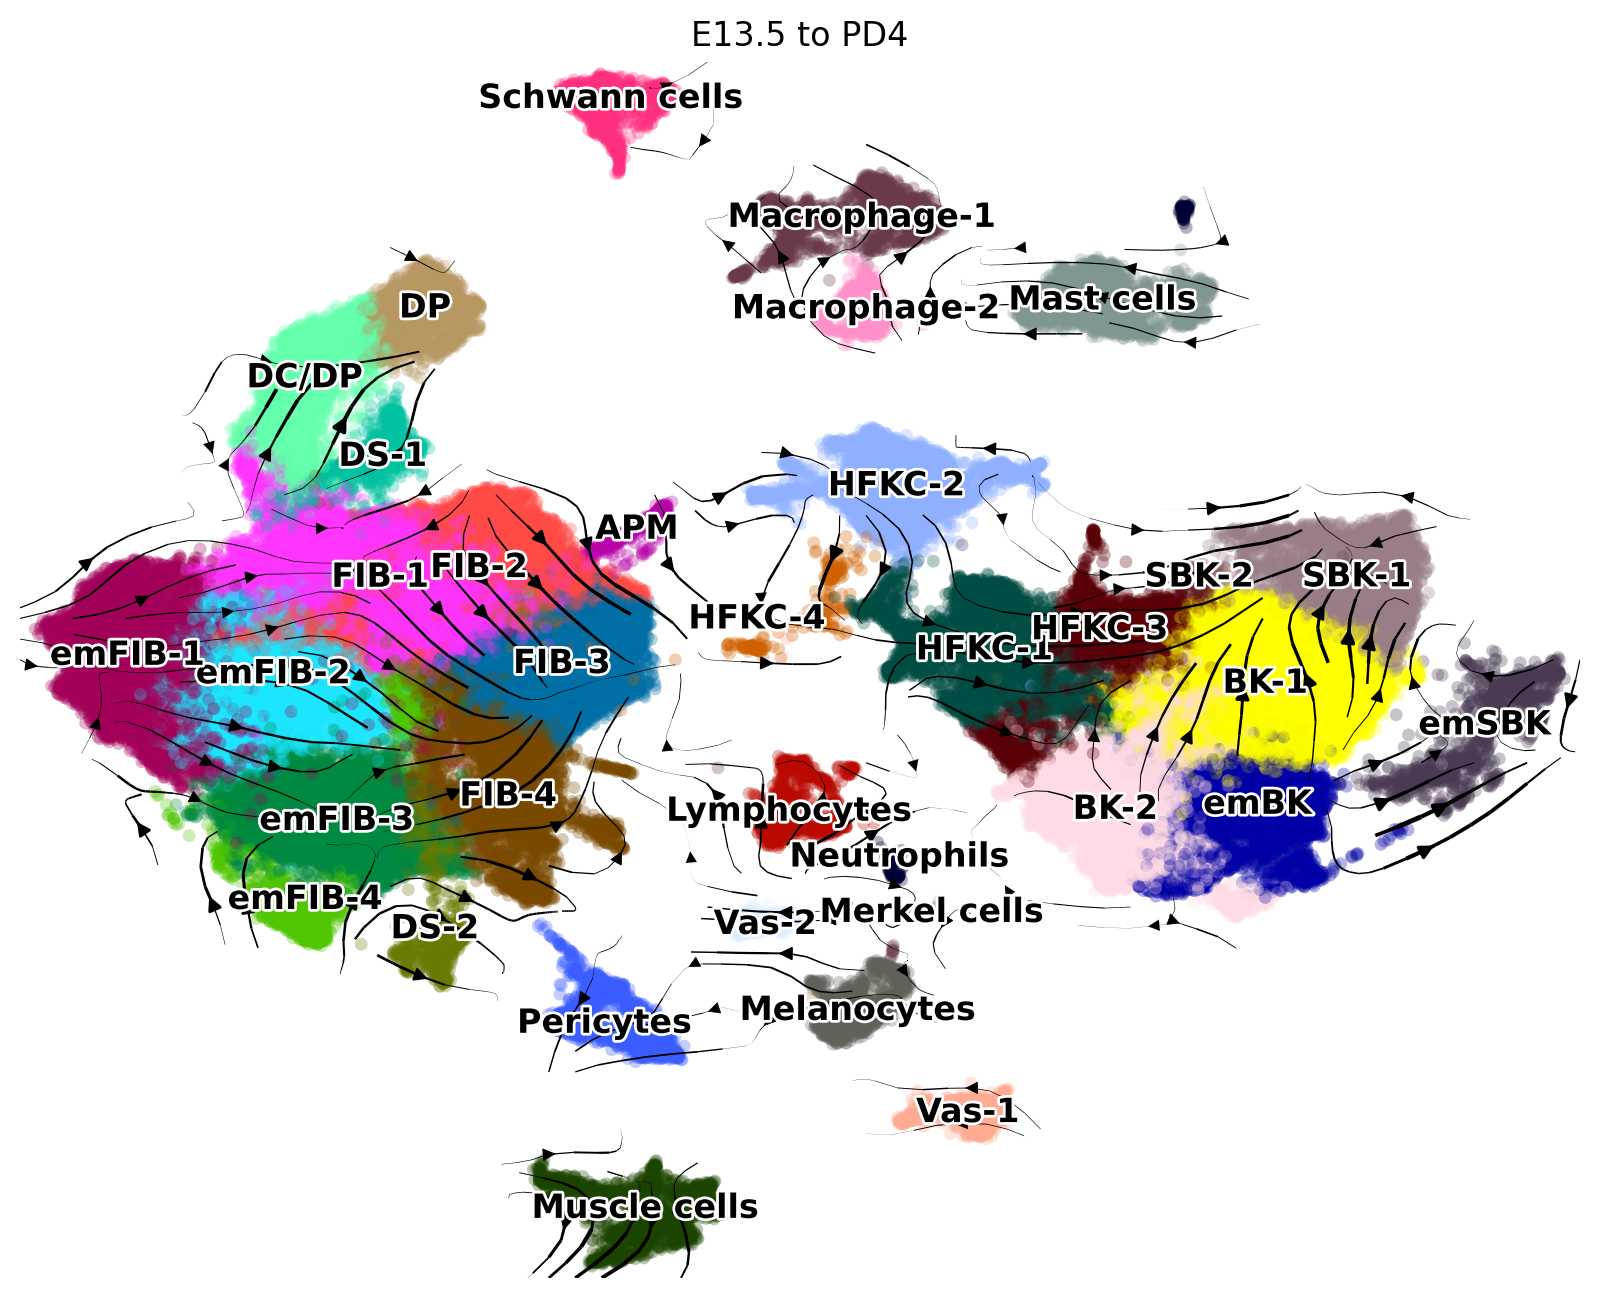

In [31]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="E13.5 to PD4", color="sub_cluster", figsize=(10,8), legend_fontoutline=2, save ="velocity_entire_title.tif"
)

## ------------------

## Time window E13.5 to E16.5

In [33]:
adata = sc.read("adata_scviintegrated.ldata.combined.ENTIRE.h5ad")

Only considering the two last: ['.ENTIRE', '.h5ad'].
Only considering the two last: ['.ENTIRE', '.h5ad'].


In [34]:
adata_subset = adata[adata.obs['bulk.ident'].isin(['E13.5', 'E14.5', 'E16.5'])]

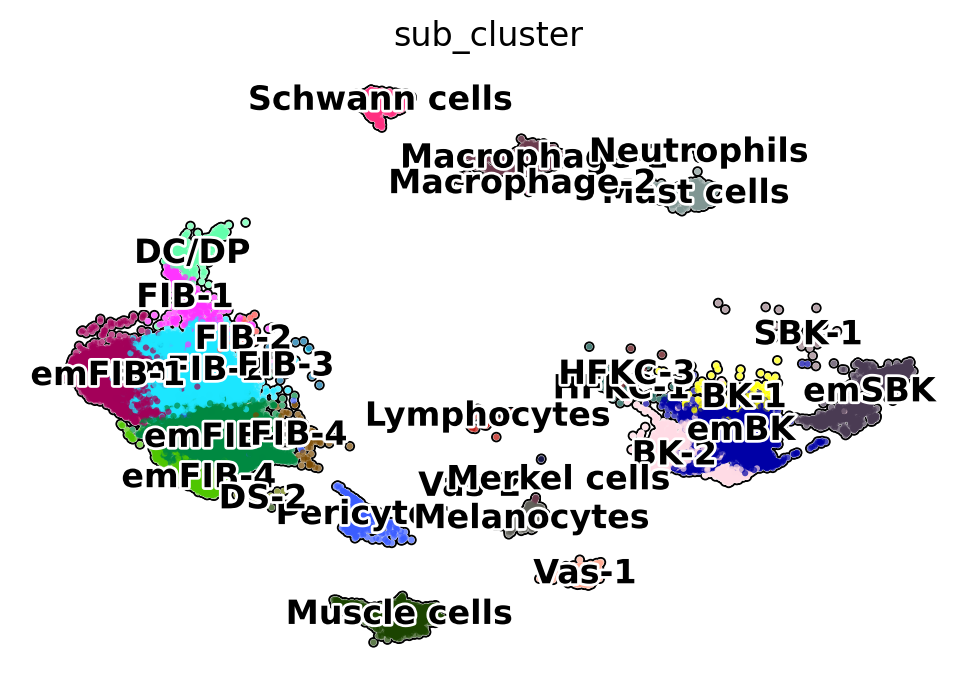

In [35]:
sc.pl.umap(
    adata_subset,
    color=["sub_cluster"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2, size=20
)

In [36]:
adata = adata_subset

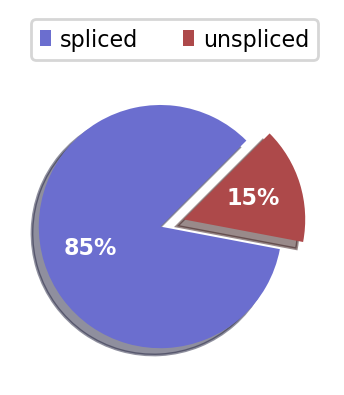

View of AnnData object with n_obs × n_vars = 26073 × 5499
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5', 'sub_cluster', '_scvi_raw_norm_scaling', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.s

In [37]:
scv.pl.proportions(adata)
adata

In [38]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.pp.neighbors(adata, use_rep="X_scVI")
scv.pp.moments(adata, n_pcs=None, n_neighbors=None) 

Filtered out 2510 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [39]:
scv.tl.recover_dynamics(adata, n_jobs=20)

recovering dynamics (using 20/80 cores)


  0%|          | 0/1537 [00:00<?, ?gene/s]

    finished (0:06:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [40]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata, n_jobs=20)

computing velocities
    finished (0:01:11) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/80 cores)


  0%|          | 0/26073 [00:00<?, ?cells/s]

    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [41]:
adata

AnnData object with n_obs × n_vars = 26073 × 2000
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5', 'sub_cluster', '_scvi_raw_norm_scaling', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFi

computing velocity embedding
    finished (0:00:07) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


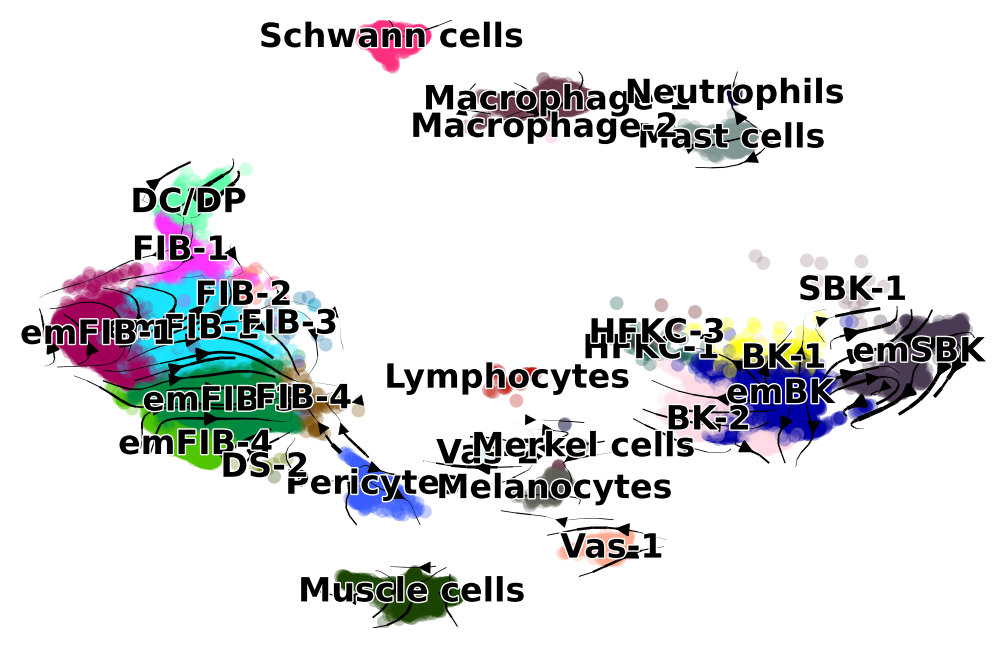

In [42]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", color="sub_cluster"
)

saving figure to file ./figures/scvelo_velocity_entire_e13.5-16.5_title.tif.pdf


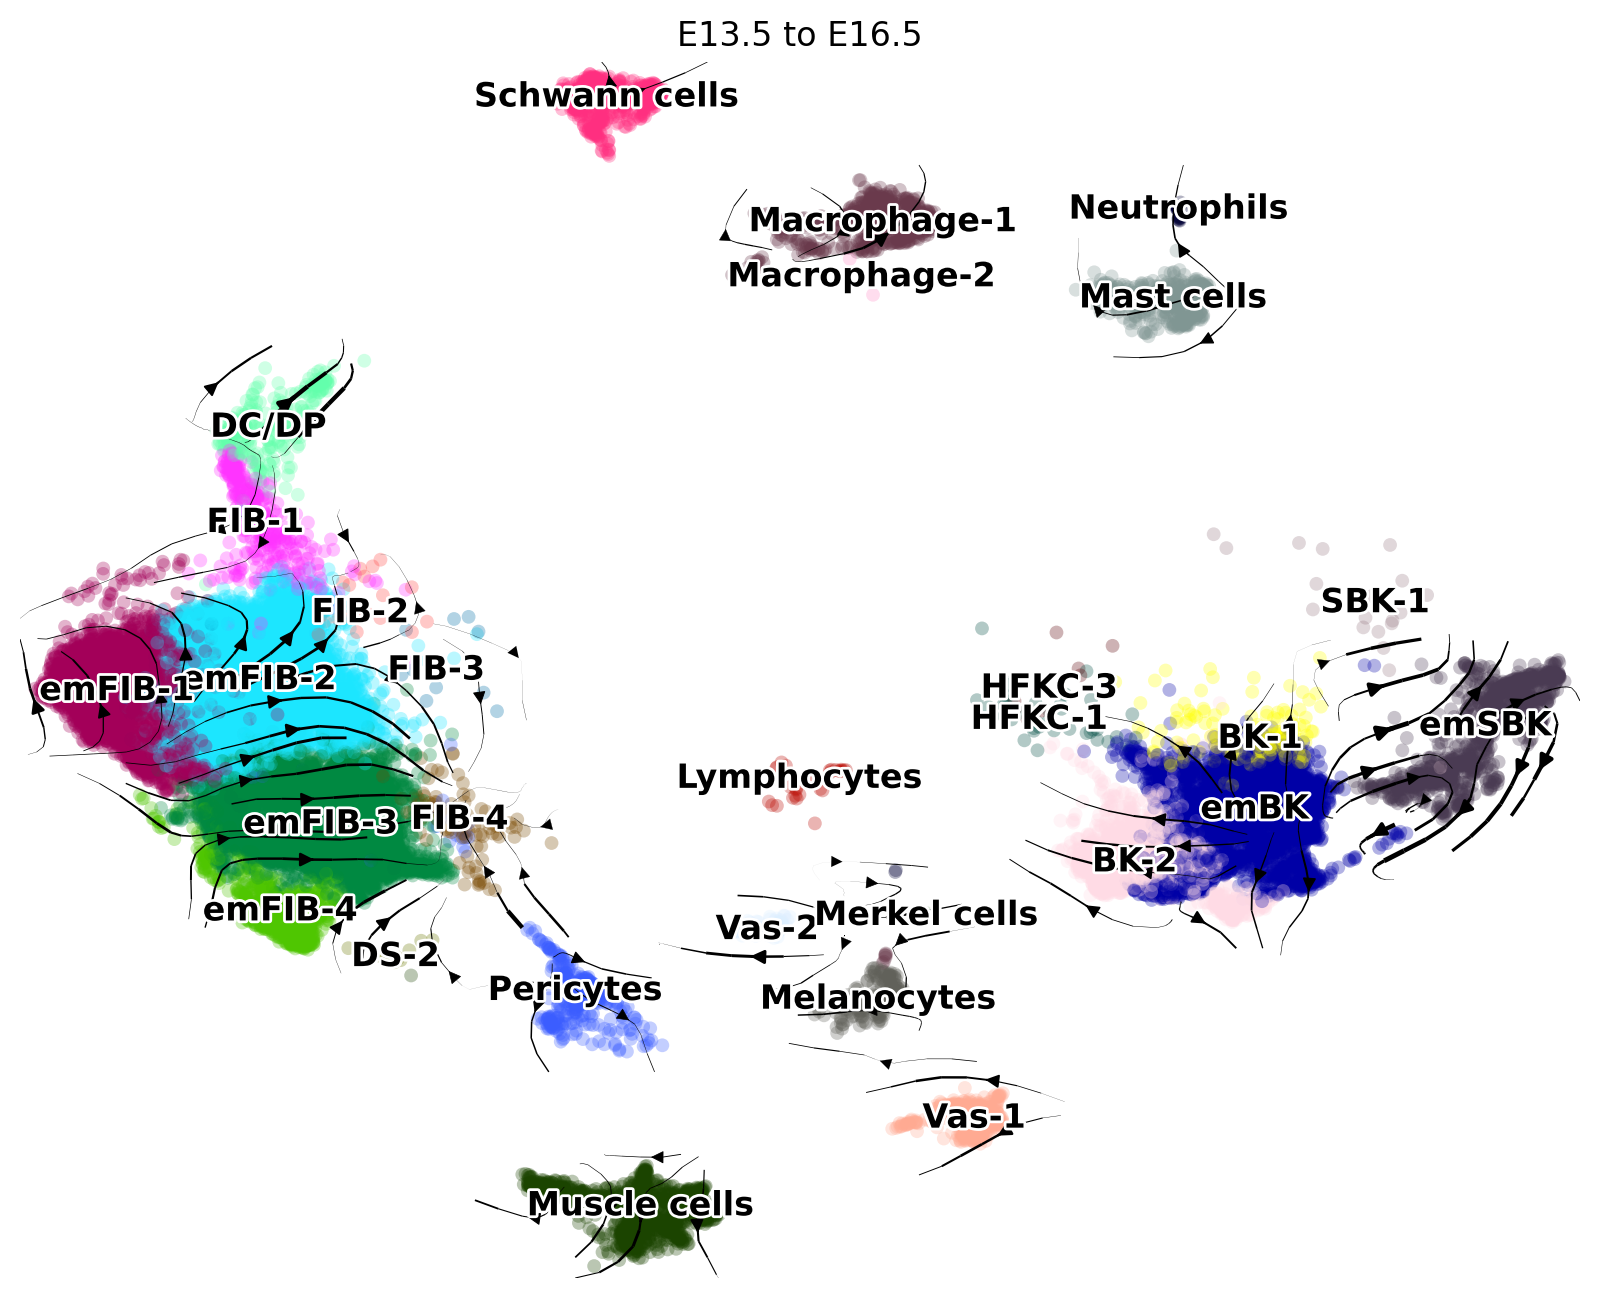

In [43]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="E13.5 to E16.5", color="sub_cluster", figsize=(10,8), legend_fontoutline=2, save ="velocity_entire_e13.5-16.5_title.tif"
)